In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/T_ML_Dataset151025.csv')

/tmp/ipython-input-4092072916.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/T_ML_Dataset151025.csv')


In [ ]:
# Show size and columns
print(df.shape)
df.head()

(594687, 28)


,device_id,ts,power_w,voltage_v,current_a,relay_on,energy_wh_acc,firmware,location,illuminance_lux,...,outlet_id,is_110v,is_220v,Bracker_amp,max_watts,hour,weekday,Month,is_weekend,is_anomaly
0,1,2024-10-07 23:50:00,732.770186,118.880771,6.163908,1,6660455,1.12.3,77327,0.0,...,1,1,0,30,3800,23,0,10,0,1
1,1,2024-10-07 23:50:00,768.632021,120.267027,6.391045,1,6658628,1.12.3,77327,0.0,...,1,1,0,30,3800,23,0,10,0,1
2,1,2024-10-08 00:00:00,835.137039,119.387939,6.995154,1,139,1.12.3,77327,0.0,...,1,1,0,30,3800,0,1,10,0,1
3,1,2024-10-08 00:10:00,619.227933,119.496472,5.181977,0,242,1.12.3,77327,0.0,...,1,1,0,30,3800,0,1,10,0,0
4,1,2024-10-08 00:20:00,524.165806,118.527716,4.422306,1,330,1.12.3,77327,0.0,...,1,1,0,30,3800,0,1,10,0,1


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594687 entries, 0 to 594686
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_id            594687 non-null  int64  
 1   ts                   594687 non-null  object 
 2   power_w              594687 non-null  float64
 3   voltage_v            594687 non-null  float64
 4   current_a            594687 non-null  float64
 5   relay_on             594687 non-null  int64  
 6   energy_wh_acc        594687 non-null  int64  
 7   firmware             594687 non-null  object 
 8   location             594687 non-null  int64  
 9   illuminance_lux      594687 non-null  float64
 10  presence             594687 non-null  int64  
 11  presence_confidence  594687 non-null  float64
 12  temp_c_avg           594687 non-null  float64
 13  Hostname             594687 non-null  object 
 14  vendor               594687 non-null  object 
 15  model            

,device_id,power_w,voltage_v,current_a,relay_on,energy_wh_acc,location,illuminance_lux,presence,presence_confidence,...,outlet_id,is_110v,is_220v,Bracker_amp,max_watts,hour,weekday,Month,is_weekend,is_anomaly
count,594687.000000,594687.000000,594687.000000,594687.000000,594687.000000,5.946870e+05,594687.0,594687.000000,594687.000000,594687.000000,...,594687.000000,594687.000000,594687.000000,594687.000000,594687.000000,594687.000000,594687.000000,594687.000000,594687.000000,594687.000000
mean,2.772495,755.884727,119.998537,6.300036,0.849776,3.246057e+06,77327.0,177.830669,0.226075,0.435731,...,4.544991,0.291002,0.708998,37.089982,7344.990894,11.497964,2.996775,6.626491,0.285767,0.787592
std,1.475042,154.625994,1.443347,1.291154,0.357291,1.946336e+06,0.0,257.105611,0.418289,0.247317,...,2.347872,0.454225,0.454225,9.567233,2930.795056,6.922330,2.001259,3.465153,0.451779,0.409012
min,1.000000,488.753063,117.500005,3.991846,0.000000,8.200000e+01,77327.0,0.000000,0.000000,0.200000,...,1.000000,0.000000,0.000000,30.000000,3800.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,638.631636,118.748183,5.319629,1.000000,1.529204e+06,77327.0,0.000000,0.000000,0.258118,...,1.000000,0.000000,0.000000,30.000000,3800.000000,5.000000,1.000000,4.000000,0.000000,1.000000
50%,3.000000,745.410975,119.997166,6.212132,1.000000,3.232541e+06,77327.0,0.000000,0.000000,0.329961,...,6.000000,0.000000,1.000000,30.000000,6600.000000,11.000000,3.000000,7.000000,0.000000,1.000000
75%,4.000000,850.103272,121.249308,7.084141,1.000000,4.935722e+06,77327.0,387.113497,0.000000,0.439590,...,6.000000,1.000000,1.000000,50.000000,11000.000000,17.000000,5.000000,10.000000,1.000000,1.000000
max,5.000000,1178.743914,122.499999,10.023153,1.000000,6.667095e+06,77327.0,719.948380,1.000000,0.999999,...,7.000000,1.000000,1.000000,50.000000,11000.000000,23.000000,6.000000,12.000000,1.000000,1.000000


In [ ]:
# Number of Nulls
df.isnull().sum()

,0
device_id,0
ts,0
power_w,0
voltage_v,0
current_a,0
relay_on,0
energy_wh_acc,0
firmware,0
location,0
illuminance_lux,0


In [ ]:
df.dropna(inplace=True)
print("✅ Filas con valores nulos eliminadas.")

✅ Filas con valores nulos eliminadas.


📊 Class distribution (is_anomaly):
  Class 0: 126316 rows (21.24%)
  Class 1: 468371 rows (78.76%)


/tmp/ipython-input-1737811432.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette=['#4CAF50','#F44336'])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


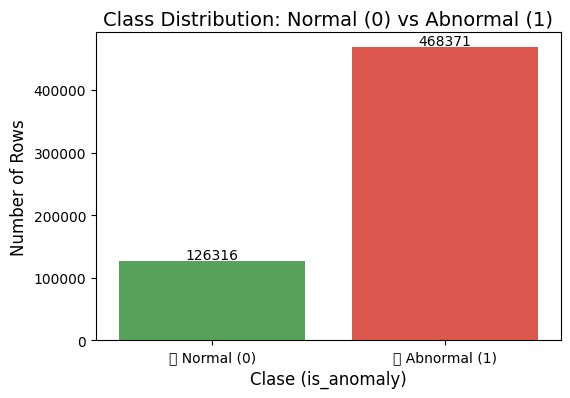

⚠️ Unbalanced dataset: minor class = 126316, Senior class = 468371 (ratio = 0.27)
👉 Sugerencia: usar SMOTE, RandomUnderSampler o class_weight='balanced' Model.


In [ ]:
# ============================================================
# 1️⃣ Análisis de balance de clases
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Contar los valores
conteo = df['is_anomaly'].value_counts().sort_index()

# Mostrar resultados numéricos
print("📊 Class distribution (is_anomaly):")
for etiqueta, cantidad in conteo.items():
    print(f"  Class {etiqueta}: {cantidad} rows ({cantidad/len(df)*100:.2f}%)")

# ============================================================
# 2️⃣ Visualización con gráfico de barras
# ============================================================
plt.figure(figsize=(6,4))
sns.barplot(x=conteo.index, y=conteo.values, palette=['#4CAF50','#F44336'])
plt.title('Class Distribution: Normal (0) vs Abnormal (1)', fontsize=14)
plt.xlabel('Clase (is_anomaly)', fontsize=12)
plt.ylabel('Number of Rows', fontsize=12)
plt.xticks([0,1], ['🟢 Normal (0)', '🔴 Abnormal (1)'])
for i, v in enumerate(conteo.values):
    plt.text(i, v + len(df)*0.005, str(v), ha='center', fontsize=10)
plt.show()

# ============================================================
# 3️⃣ Evaluación de balance
# ============================================================
minor = conteo.min()
major = conteo.max()
ratio = minor / major

if ratio < 0.5:
    print(f"⚠️ Unbalanced dataset: minor class = {minor}, Senior class = {major} (ratio = {ratio:.2f})")
    print("👉 Sugerencia: usar SMOTE, RandomUnderSampler o class_weight='balanced' Model.")
else:
    print(f"✅ Dataset balanceado (ratio = {ratio:.2f})")


In [ ]:
# ============================================================
# 1️⃣ Instalar e importar SMOTE
# ============================================================
!pip install imbalanced-learn --quiet
from imblearn.over_sampling import SMOTE
import pandas as pd

# ============================================================
# 2️⃣ Aplicar balanceo con SMOTE
# ============================================================
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

# ============================================================
# 3️⃣ Reconstruir el DataFrame balanceado
# ============================================================
# X_bal es un numpy array, y_bal es un vector → hay que unirlos
df_bal = pd.DataFrame(X_bal, columns=X.columns)
df_bal['is_anomaly'] = y_bal

# ============================================================
# 4️⃣ Verificar el nuevo balance
# ============================================================
conteo = df_bal['is_anomaly'].value_counts()
print("📊 Nueva distribución tras SMOTE:")
for k, v in conteo.items():
    print(f"  Clase {k}: {v} registros ({v/len(df_bal)*100:.2f}%)")

# ============================================================
# 5️⃣ Dividir dataset balanceado
# ============================================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_bal.drop('is_anomaly', axis=1),
    df_bal['is_anomaly'],
    test_size=0.2,
    random_state=42,
    stratify=df_bal['is_anomaly']
)

print(f"\n✅ Dataset listo. Tamaño final:")
print(f"  Train: {len(X_train)} | Test: {len(X_test)}")



📊 Nueva distribución tras SMOTE:
  Clase 1: 468371 registros (50.00%)
  Clase 0: 468371 registros (50.00%)

✅ Dataset listo. Tamaño final:
  Train: 749393 | Test: 187349


📊 Class distribution (is_anomaly):
  Class 0: 468371 rows (50.00%)
  Class 1: 468371 rows (50.00%)


/tmp/ipython-input-2088039122.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette=['#4CAF50','#F44336'])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


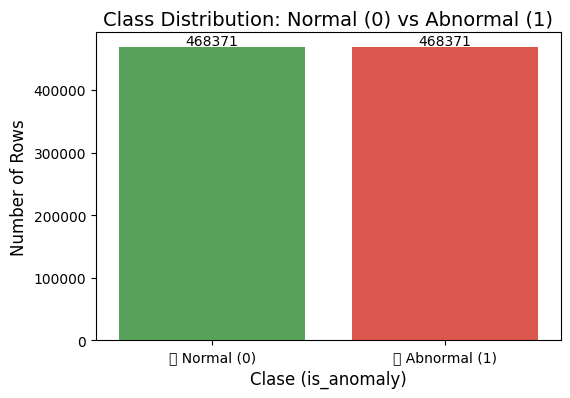

✅ Dataset balanceado (ratio = 1.00)


In [ ]:
# ============================================================
# 1️⃣ Análisis de balance de clases
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Contar los valores
conteo =  df_bal['is_anomaly'].value_counts().sort_index()

# Mostrar resultados numéricos
print("📊 Class distribution (is_anomaly):")
for etiqueta, cantidad in conteo.items():
    print(f"  Class {etiqueta}: {cantidad} rows ({cantidad/len(df_bal)*100:.2f}%)")

# ============================================================
# 2️⃣ Visualización con gráfico de barras
# ============================================================
plt.figure(figsize=(6,4))
sns.barplot(x=conteo.index, y=conteo.values, palette=['#4CAF50','#F44336'])
plt.title('Class Distribution: Normal (0) vs Abnormal (1)', fontsize=14)
plt.xlabel('Clase (is_anomaly)', fontsize=12)
plt.ylabel('Number of Rows', fontsize=12)
plt.xticks([0,1], ['🟢 Normal (0)', '🔴 Abnormal (1)'])
for i, v in enumerate(conteo.values):
    plt.text(i, v + len(df)*0.005, str(v), ha='center', fontsize=10)
plt.show()

# ============================================================
# 3️⃣ Evaluación de balance
# ============================================================
minor = conteo.min()
major = conteo.max()
ratio = minor / major

if ratio < 0.5:
    print(f"⚠️ Unbalanced dataset: minor class = {minor}, Senior class = {major} (ratio = {ratio:.2f})")
    print("👉 Sugerencia: usar SMOTE, RandomUnderSampler o class_weight='balanced' Model.")
else:
    print(f"✅ Dataset balanceado (ratio = {ratio:.2f})")

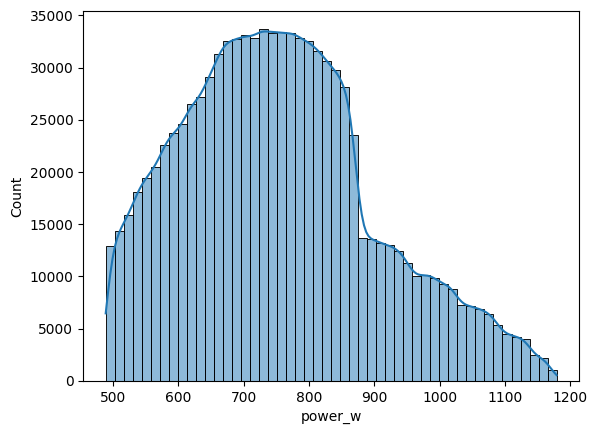

In [ ]:
sns.histplot(df_bal['power_w'], bins=50, kde=True)
plt.show()

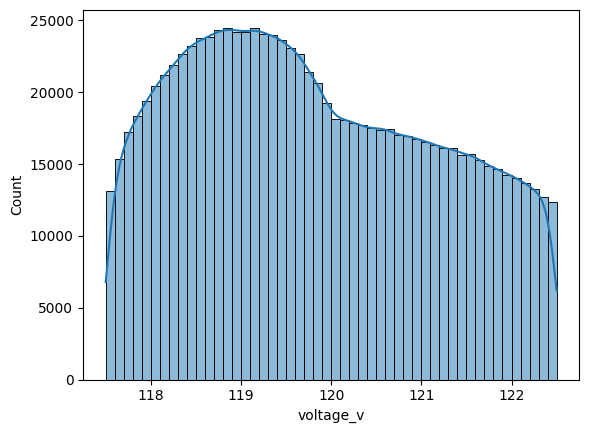

In [ ]:
sns.histplot(df_bal['voltage_v'], bins=50, kde=True)
plt.show()

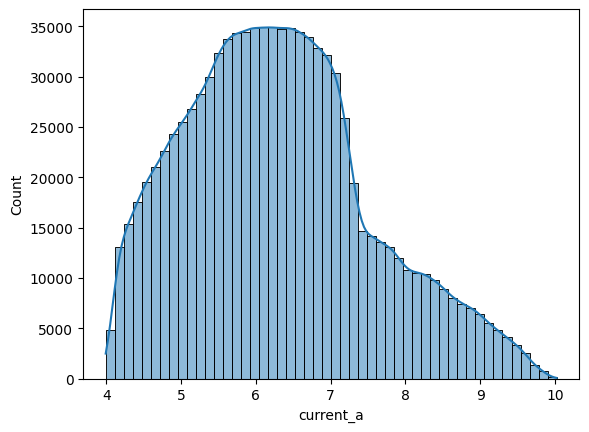

In [ ]:
sns.histplot(df_bal['current_a'], bins=50, kde=True)
plt.show()

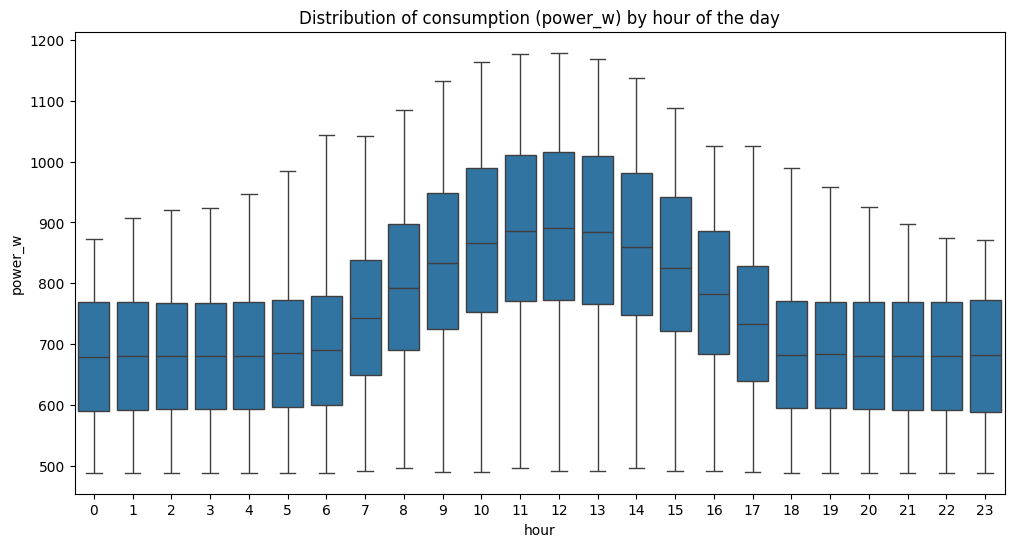

In [ ]:
# df_bal['ts'] = pd.to_datetime(df_bal['ts']) # This line is removed
# df_bal['hour'] = df_bal['ts'].df_bal.hour # This line is removed


plt.figure(figsize=(12,6))
sns.boxplot(x='hour', y='power_w', data=df_bal)
plt.title('Distribution of consumption (power_w) by hour of the day')
plt.show()

In [ ]:
df_bal['is_daytime'] = ((df_bal['hour'] >= 7) & (df_bal['hour'] <= 19)).astype(int)

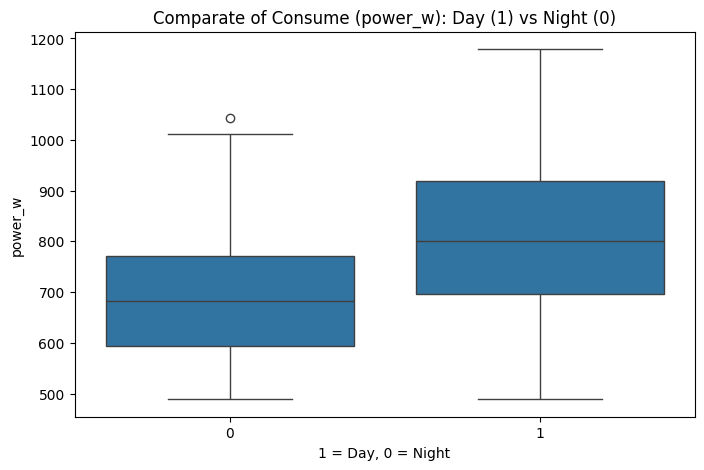

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_daytime', y='power_w', data=df_bal)
plt.title('Comparate of Consume (power_w): Day (1) vs Night (0)')
plt.xlabel('1 = Day, 0 = Night')
plt.show()

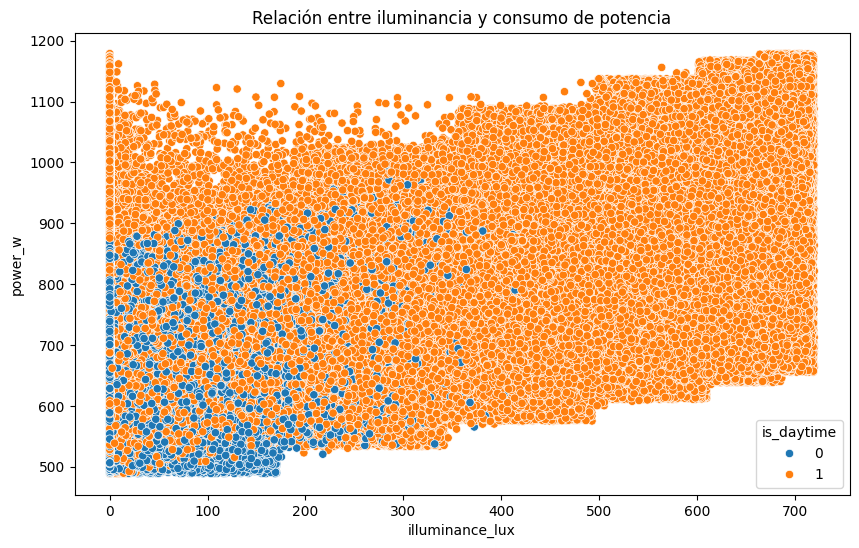

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='illuminance_lux', y='power_w', hue='is_daytime', data=df_bal)
plt.title('Relación entre iluminancia y consumo de potencia')
plt.show()

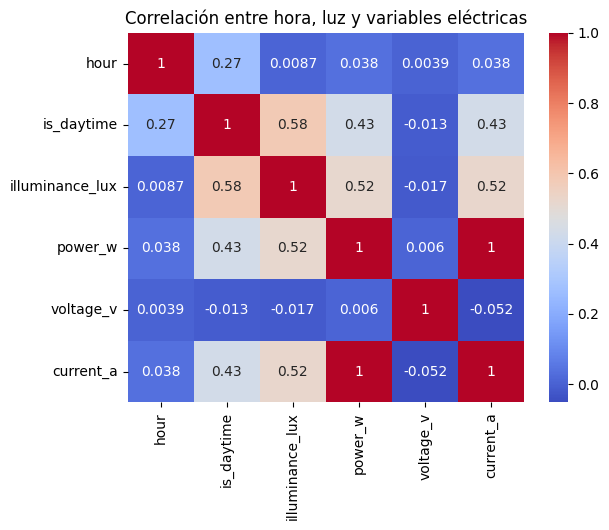

In [ ]:
context_vars = ['hour', 'is_daytime', 'illuminance_lux', 'power_w', 'voltage_v', 'current_a']
sns.heatmap(df_bal[context_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre hora, luz y variables eléctricas')
plt.show()


In [ ]:
# Clean Data

In [ ]:
# Revisar columnas actuales
print("Columnas originales:", df_bal.columns.tolist())

# Eliminar columnas irrelevantes
columns_to_drop = ['firmware', 'vendor', 'Hostname', 'location']

# Eliminar una de is_110v o is_220v (mantener solo una)
# Ejemplo: creamos una columna combinada y borramos ambas
df_bal['voltage_type'] = df['is_220v'].apply(lambda x: '220V' if x == 1 else '110V')

# Luego eliminamos las originales
columns_to_drop.extend(['is_110v', 'is_220v'])

# Aplicar eliminación
df_bal.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("Columnas después de limpieza:", df_bal.columns.tolist())

Columnas originales: ['power_w', 'voltage_v', 'current_a', 'relay_on', 'energy_wh_acc', 'illuminance_lux', 'presence', 'presence_confidence', 'temp_c_avg', 'device_type', 'area', 'outlet_id', 'is_110v', 'is_220v', 'Bracker_amp', 'max_watts', 'hour', 'weekday', 'Month', 'is_weekend', 'is_anomaly', 'is_daytime']
Columnas después de limpieza: ['power_w', 'voltage_v', 'current_a', 'relay_on', 'energy_wh_acc', 'illuminance_lux', 'presence', 'presence_confidence', 'temp_c_avg', 'device_type', 'area', 'outlet_id', 'Bracker_amp', 'max_watts', 'hour', 'weekday', 'Month', 'is_weekend', 'is_anomaly', 'is_daytime', 'voltage_type']


In [ ]:
# Featuring Engeniering

In [ ]:

# Aplicar One-Hot Encoding a 'device_type' y 'area'
df_encoded = pd.get_dummies(df_bal, columns=['device_type', 'area'], prefix=['dev', 'area'])

# Verificar las nuevas columnas
print("Nuevas columnas:", [col for col in df_encoded.columns if 'dev_' in col or 'area_' in col])

Nuevas columnas: ['dev_1', 'dev_3', 'dev_4', 'dev_5', 'dev_6', 'dev_7', 'dev_8', 'area_1', 'area_2', 'area_3', 'area_4']


In [ ]:
print(df_encoded.head())

      power_w   voltage_v  current_a  relay_on  energy_wh_acc  \
0  732.770186  118.880771   6.163908         1        6660455   
1  768.632021  120.267027   6.391045         1        6658628   
2  835.137039  119.387939   6.995154         1            139   
3  619.227933  119.496472   5.181977         0            242   
4  524.165806  118.527716   4.422306         1            330   

   illuminance_lux  presence  presence_confidence  temp_c_avg  outlet_id  ...  \
0              0.0         0             0.276138   16.479134          1  ...   
1              0.0         0             0.375432   16.308392          1  ...   
2              0.0         0             0.379196   14.872813          1  ...   
3              0.0         0             0.225525   14.872813          1  ...   
4              0.0         0             0.304784   14.872813          1  ...   

   dev_3  dev_4  dev_5  dev_6  dev_7  dev_8  area_1  area_2 area_3  area_4  
0  False  False  False  False  False  False  

In [ ]:
print(f"Dataset cargado: {df_bal.shape[0]} registros, {df_bal.shape[1]} columnas")

# 2️⃣ Seleccionar features y variable objetivo
# --------------------------------------------------------------
# Usamos variables eléctricas y contextuales como features,
# y 'is_anomaly' como etiqueta (target)
target = 'is_anomaly'

# Excluir columnas no predictivas o de identificación
excluded_cols = ['device_id', 'ts']
X = df.drop(columns=excluded_cols + [target], errors='ignore')
y = df[target]

print(f"Variables predictoras: {X.shape[1]} | Target: '{target}'")

Dataset cargado: 936742 registros, 21 columnas
Variables predictoras: 25 | Target: 'is_anomaly'


In [ ]:
if 'voltage_type' in X.columns:
    X['voltage_type'] = X['voltage_type'].replace({'110V': 0, '220V': 1})

In [ ]:
# Detectar columnas no numéricas
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Columnas no numéricas eliminadas:", non_numeric_cols)

# Eliminar columnas de texto
X = X.drop(columns=non_numeric_cols, errors='ignore')


Columnas no numéricas eliminadas: ['firmware', 'Hostname', 'vendor', 'model']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# División del dataset: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,      # 20% de los datos para prueba
    random_state=42,    # reproducibilidad
    stratify=y          # mantiene la proporción de anomalías
)

print(f"Entrenamiento: {X_train.shape[0]} muestras | Prueba: {X_test.shape[0]} muestras")


Entrenamiento: 475749 muestras | Prueba: 118938 muestras


In [ ]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)
print("✅ Modelo entrenado correctamente.")


✅ Modelo entrenado correctamente.


🎯 Accuracy: 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25263
           1       1.00      1.00      1.00     93675

    accuracy                           1.00    118938
   macro avg       1.00      1.00      1.00    118938
weighted avg       1.00      1.00      1.00    118938



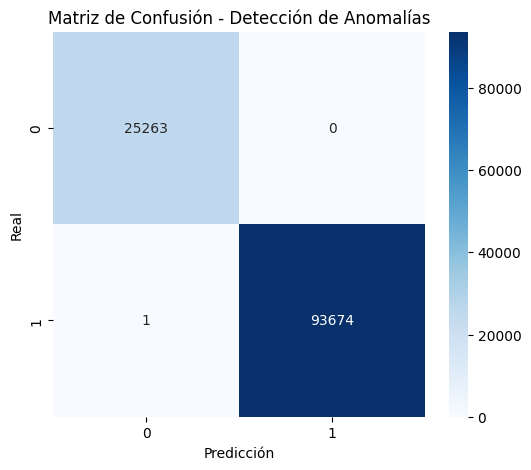

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Métricas principales
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Detección de Anomalías')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


In [ ]:
# Ejemplo: registro de HVAC
nuevo_registro = {
    'power_w': 0,
    'voltage_v': 0,
    'current_a': 0,
    'relay_on': 1,
    'energy_wh_acc': 128200,
    'presence': 1,
    'presence_confidence': 0.9,
    'temp_c_avg': 23.5,
    'Bracker_amp': 30,
    'max_watts': 6000,
    'power_rate': 0 / 6000,   # 0.8
    'hour': 14,
    'is_daytime': 1,
    'weekday': 2,
    'area_1': 0, 'area_2': 1, 'area_3': 0,  # depende del encoding
    'device_type_1': 0, 'device_type_2': 1, 'device_type_3': 0,
    'device_type_4': 0, 'device_type_5': 0, 'device_type_6': 0,
    'device_type_7': 0, 'device_type_8': 0,
    'voltage_type': 1   # 220V
}


In [ ]:
# Nuevo registro (dentro de rango normal)
nuevo_registro = {
    'power_w': 4200,            # normal
    'voltage_v': 230,           # normal (200–240 V)
    'current_a': 18.3,          # normal (15–30 A)
    'relay_on': 1,
    'energy_wh_acc': 550000,
    'presence': 1,
    'presence_confidence': 0.95,
    'temp_c_avg': 45.2,
    'Bracker_amp': 30,
    'max_watts': 5500,
    'power_rate': 4200 / 5500,  # ≈0.76
    'hour': 10,
    'is_daytime': 1,
    'weekday': 2,
    'voltage_type': 1,  # 220 V
    # 🔸 Encoding de ejemplo
    'area_1': 1, 'area_2': 0, 'area_3': 0,
    'device_type_1': 1, 'device_type_2': 0, 'device_type_3': 0,
    'device_type_4': 0, 'device_type_5': 0, 'device_type_6': 0,
    'device_type_7': 0, 'device_type_8': 0
}

In [ ]:
df_new = pd.DataFrame([nuevo_registro])

# Ensure the new dataframe has the same columns as X, in the same order
# This is crucial because the scaler was fitted on X
missing_cols = set(X.columns) - set(df_new.columns)
for c in missing_cols:
    df_new[c] = 0  # Add missing columns with a default value (e.g., 0 for one-hot encoded)

# Reorder columns to match the order of X
df_new = df_new[X.columns]

# Escalar con el mismo StandardScaler
df_scaled = scaler.transform(df_new)

In [ ]:

# Predicción
prediccion = model.predict(df_scaled)
probabilidad = model.predict_proba(df_scaled)

# Interpretar el resultado
estado = "🟢 Normal (0)" if int(prediccion[0]) == 0 else "🔴 Abnormal (1)"

print(f"Predicción: {estado}")
print(f"Probabilidad de anomalía: {probabilidad[0][1]*100:.2f}%")



Predicción: 🔴 Abnormal (1)
Probabilidad de anomalía: 98.00%


In [ ]:
!pip install lazypredict

In [ ]:
import gc, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC

# 1) Carga
df = pd.read_csv('/content/T_ML_Dataset151025.csv')

assert 'is_anomaly' in df.columns, "Falta is_anomaly"
y = df['is_anomaly'].astype(int)

# Quita columnas no predictivas / textuales
drop_cols = [c for c in ['device_id','ts','Hostname','firmware','vendor','location','model'] if c in df.columns]
X = df.drop(columns=drop_cols + ['is_anomaly'], errors='ignore')

# Normaliza voltage_type si quedó como texto
if 'voltage_type' in X.columns and X['voltage_type'].dtype == 'object':
    X['voltage_type'] = X['voltage_type'].replace({'110V':0, '220V':1})

# Elimina no numéricas y NaN/Inf
X = X.select_dtypes(include=[np.number]).replace([np.inf, -np.inf], np.nan).fillna(0)

# 2) Muestreo estratificado: máx 15k por clase (ajusta si necesitas)
max_per_class = 15000
idx_keep = []
for c, idx in y.groupby(y).groups.items():
    take = np.random.RandomState(42).choice(idx, size=min(len(idx), max_per_class), replace=False)
    idx_keep.append(take)
idx_keep = np.concatenate(idx_keep)
X_s = X.iloc[idx_keep].astype('float32')
y_s = y.iloc[idx_keep].astype('int8')

print("Tamaño tras muestreo:", X_s.shape, dict(pd.Series(y_s).value_counts()))

# 3) Split antes del escalado
X_train, X_test, y_train, y_test = train_test_split(
    X_s, y_s, test_size=0.2, stratify=y_s, random_state=42
)

# 4) Selección de features (quedarse con las K mejores)
K = min(60, X_train.shape[1])  # hasta 60, ajusta según RAM
mi = mutual_info_classif(X_train, y_train, random_state=42)
topk_idx = np.argsort(mi)[-K:]
cols_k = X_train.columns[topk_idx]
X_train = X_train[cols_k].copy()
X_test  = X_test[cols_k].copy()

# 5) Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# 6) Benchmark ligero de modelos
models = {
    "LogReg": LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=None),
    "SGD": SGDClassifier(loss='log_loss', class_weight='balanced', random_state=42),
    "RF": RandomForestClassifier(n_estimators=200, max_depth=16, class_weight='balanced', random_state=42),
    "ET": ExtraTreesClassifier(n_estimators=300, max_depth=16, random_state=42),
    "GB": GradientBoostingClassifier(random_state=42),
    "LinSVC": LinearSVC(dual='auto', random_state=42)
}

rows = []
for name, m in models.items():
    try:
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)
        rows.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred, zero_division=0),
            "Precision": precision_score(y_test, y_pred, zero_division=0)
        })
    except Exception as e:
        rows.append({"Model": name, "Accuracy": np.nan, "F1": np.nan, "Recall": np.nan, "Precision": np.nan})
        print(f"✖ {name} falló:", repr(e))
    finally:
        gc.collect()

bench = pd.DataFrame(rows).sort_values('F1', ascending=False)
print(bench)
bench.to_csv('/content/model_benchmark_manual.csv', index=False)
print("✅ Ranking guardado en /content/model_benchmark_manual.csv")



/tmp/ipython-input-3277236342.py:11: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/T_ML_Dataset151025.csv')


Tamaño tras muestreo: (30000, 20) {0: np.int64(15000), 1: np.int64(15000)}
    Model  Accuracy        F1    Recall  Precision
4      GB  1.000000  1.000000  1.000000   1.000000
2      RF  1.000000  1.000000  1.000000   1.000000
3      ET  0.993500  0.993457  0.987000   1.000000
0  LogReg  0.983000  0.982706  0.966000   1.000000
1     SGD  0.981667  0.981375  0.966000   0.997247
5  LinSVC  0.978167  0.977679  0.956333   1.000000
✅ Ranking guardado en /content/model_benchmark_manual.csv


| Model                 | Accuracy  | F1        | Recall    | Precision |
| --------------------- | --------- | --------- | --------- | --------- |
| RF (RandomForest)     | **1.000** | **1.000** | **1.000** | **1.000** |
| GB (GradientBoosting) | **1.000** | **1.000** | **1.000** | **1.000** |
| ET (ExtraTrees)       | 0.993     | 0.993     | 0.987     | **1.000** |
| LogReg                | 0.983     | 0.983     | 0.966     | **1.000** |
| SGD                   | 0.982     | 0.981     | 0.966     | 0.997     |
| LinSVC                | 0.978     | 0.978     | 0.956     | **1.000** |


In [ ]:
from sklearn.model_selection import cross_val_score
for name, model in [("RF", RandomForestClassifier(n_estimators=200, max_depth=16, random_state=42)),
                    ("ET", ExtraTreesClassifier(n_estimators=300, max_depth=16, random_state=42)),
                    ("GB", GradientBoostingClassifier(random_state=42))]:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    print(f"{name}: mean F1={scores.mean():.3f} ± {scores.std():.3f}")


RF: mean F1=1.000 ± 0.000
ET: mean F1=0.993 ± 0.001
GB: mean F1=1.000 ± 0.000


In [ ]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined and preprocessed from previous steps
# If not, you would need to include the data loading and preprocessing here
# For demonstration, let's use the sampled and scaled data from the previous benchmark cell
# You might want to adjust this based on which data you want to use for the final model

# Re-split the sampled data to ensure X_train, X_test, y_train, y_test are available
# (This is a workaround; ideally, you would save/load these as well or retrain on the full data)
X_s = X.iloc[idx_keep].astype('float32') # Use the sampled data indices from the benchmark cell
y_s = y.iloc[idx_keep].astype('int8')

# Split before scaling
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_s, y_s, test_size=0.2, stratify=y_s, random_state=42
)

# Use the columns selected by mutual information from the benchmark cell
X_train_processed = X_train_split[cols_k].copy()
X_test_processed  = X_test_split[cols_k].copy()


# Re-fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled  = scaler.transform(X_test_processed)


# Train a RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=16, # Using a max_depth from the benchmark that performed well
    random_state=42,
    class_weight='balanced' # Using balanced class weight as in previous cells
)
model.fit(X_train_scaled, y_train_split) # Train on the scaled training data

# Save the trained model and scaler
joblib.dump(model, '/content/failure_predictor_rf.pkl')
joblib.dump(scaler, '/content/failure_predictor_scaler.pkl')

print("✅ Model and scaler trained and saved.")

# Cargar modelo y scaler
loaded_model = joblib.load('/content/failure_predictor_rf.pkl')
loaded_scaler = joblib.load('/content/failure_predictor_scaler.pkl')
print("✅ Model and scaler loaded.")

# Crear registro
record = {
    'power_w': 4200,            # normal
    'voltage_v': 230,           # normal (200–240 V)
    'current_a': 18.3,          # normal (15–30 A)
    'relay_on': 1,
    'energy_wh_acc': 550000,
    'presence': 1,
    'presence_confidence': 0.95,
    'temp_c_avg': 45.2,
    'Bracker_amp': 30,
    'max_watts': 5500,
    'power_rate': 4200 / 5500,  # ≈0.76
    'hour': 10,
    'is_daytime': 1,
    'weekday': 2,
    'voltage_type': 1,  # 220 V
    # 🔸 Encoding de ejemplo - ensure these match the columns in X used for training
    # Based on the benchmark cell, the columns used were those in cols_k
    # You need to ensure the record dictionary includes all columns in cols_k,
    # including the one-hot encoded ones if they were selected.
    # For this example, let's manually add the one-hot encoded columns based on the benchmark output
    # Assuming 'area_1' and 'device_type_1' might be in cols_k
    'area_1': 1, # Example value
    'area_2': 0, # Example value
    'area_3': 0, # Example value
    'area_4': 0, # Example value
    'dev_1': 1, # Example value
    'dev_4': 0, # Example value
    'dev_5': 0, # Example value
    'dev_7': 0, # Example value
    'dev_8': 0, # Example value
    'outlet_id': 1, # Assuming this is in cols_k
    'Month': 10 # Assuming this is in cols_k
    # Add other columns from cols_k with appropriate values for the record
}

# Preprocess the new record
df_new = pd.DataFrame([record])

# Ensure the new dataframe has the same columns as the training data (X_train_processed)
# This is crucial because the scaler was fitted on X_train_processed
missing_cols = set(X_train_processed.columns) - set(df_new.columns)
for c in missing_cols:
    df_new[c] = 0  # Add missing columns with a default value (e.g., 0 for one-hot encoded)

# Reorder columns to match the order of the training data
df_new = df_new[X_train_processed.columns]


# Escalar con el mismo StandardScaler
df_scaled_record = loaded_scaler.transform(df_new)

# Predicción
pred = loaded_model.predict(df_scaled_record)[0]
proba = loaded_model.predict_proba(df_scaled_record)[0][1]
print("Predicción:", pred, "| Probabilidad:", proba)

✅ Model and scaler trained and saved.
✅ Model and scaler loaded.
Predicción: 1 | Probabilidad: 0.93
